<a href="https://colab.research.google.com/github/Ahibala/Insurance-Premium-Prediction-/blob/main/Classification_Model__Naive_Bayes_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Naive Bayes**

## Step 1 --> Data Gathering 

#### Downloading kaggle data sets direclty into colab 

In [ ]:
#Installing kaggle library
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### upload kaggle.json file which contain the user kaggle detail 

In [ ]:
from google.colab import drive 
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
#Make a directory for kaggle at the tempoary instacne location on colab drive 
! mkdir ~/.kaggle

!cp /gdrive/MyDrive/project/Machine_Learning/Insurance_premium_prediction/kaggle.json ~/.kaggle/kaggle.json

# change the file permission to read/write to the owner only 
!chmod 600 ~/.kaggle/kaggle.json  

### Download and the extract the datasets

In [ ]:
#Downlad the datasets
!kaggle datasets download noordeen/insurance-premium-prediction

  0% 0.00/13.4k [00:00<?, ?B/s]
100% 13.4k/13.4k [00:00<00:00, 3.58MB/s]


In [ ]:
#Extracting the compressed data
!unzip insurance-premium-prediction.zip

Archive:  insurance-premium-prediction.zip
  inflating: insurance.csv           


## Step 2 -->  Data cleaning 

In [127]:
# Importing librires 

import pandas as pd  #For analyzing, cleaning, exploring, and manipulating data.
import numpy as np   # Python library used for working with arrays

In [128]:
# Loading the dataset to a pandas Dataframe 
df=pd.read_csv('/gdrive/MyDrive/project/Machine_Learning/Insurance_premium_prediction/insurance.csv')


In [130]:
# To see first five rows of dataset
df.head()


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [131]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [132]:
# To check how many rows and column we having 
df.shape

(1338, 7)

In [133]:
#cheking for missing vaules
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [134]:
#summerizing the stats of the data
df.describe() 

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [135]:
# checking for data type for each column s
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [136]:
#To get list of categorical variables

# List(dataset.select_dtypes(include=['object']).columns)  Method_1
check = (df.dtypes == 'object') #Method_2
categorical_var = list(check[check].index)

print(f"list of categorical variables {categorical_var}")

#Finding unique number and value in categorical data
for col in categorical_var:
    unique_no = df[col].nunique()
    unique_value = df[col].unique()
    print (f'Number of varibale in {col} are: {unique_no}, there are {unique_value}')



list of categorical variables ['sex', 'smoker', 'region']
Number of varibale in sex are: 2, there are ['female' 'male']
Number of varibale in smoker are: 2, there are ['yes' 'no']
Number of varibale in region are: 4, there are ['southwest' 'southeast' 'northwest' 'northeast']


## Step 3  --> Formatting the data for decision tree  

### Formating Data part 1 ---> converting the target numeric data to categorical data  

In [137]:
#viweing current dataset
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [138]:
# Create a new categorical feature 'expenses' based on quartiles
expense_labels = ['low', 'medium', 'high']

df['expenses'] = pd.qcut(df['expenses'], q=3, labels=expense_labels)

# Print the first few rows to verify the new feature

print(df.head())


   age     sex   bmi  children smoker     region expenses
0   19  female  27.9         0    yes  southwest     high
1   18    male  33.8         1     no  southeast      low
2   28    male  33.0         3     no  southeast      low
3   33    male  22.7         0     no  northwest     high
4   32    male  28.9         0     no  northwest      low


By using World Health Organization (WHO) classification the BMI variable into several categories,

such as,
*   under weight (BMI < 18.5),
*   normal weight (BMI 18.5-24.9),
*   over weight (BMI 25-29.9),
*   obese_1 (BMI 30-34.9)
*   obese_2 (BMI ≥ 35)


In [139]:
# Create categorical group for 'bmi'

df['bmi_group'] = pd.cut(df['bmi'], bins=[15, 18.5, 25, 30, 35, 50], labels=['Underweight', 'Normal', 'Overweight', 'Obese1', 'Obese2'])
df.drop(['bmi'], axis=1, inplace=True)
df.head()

,age,sex,children,smoker,region,expenses,bmi_group
0,19,female,0,yes,southwest,high,Overweight
1,18,male,1,no,southeast,low,Obese1
2,28,male,3,no,southeast,low,Obese1
3,33,male,0,no,northwest,high,Normal
4,32,male,0,no,northwest,low,Overweight


 Mking age groups (e.g., 18-25, 26-35, 36-45, etc.)

In [140]:
# Create categorical group  for 'age'

df['age_group'] = pd.cut(df['age'], bins=[17, 25, 35, 45, 55, 65], labels=['18-25', '26-35', '36-45', '46-55', '56-65'])
df.drop(['age'], axis=1, inplace=True)
df.head()

,sex,children,smoker,region,expenses,bmi_group,age_group
0,female,0,yes,southwest,high,Overweight,18-25
1,male,1,no,southeast,low,Obese1,18-25
2,male,3,no,southeast,low,Obese1,26-35
3,male,0,no,northwest,high,Normal,26-35
4,male,0,no,northwest,low,Overweight,26-35


#### checking the data is balance data or not :


In [141]:
# checking the data is balance data or not :

expenses_count = df['expenses'].value_counts(normalize=True)
print(expenses_count)

low       0.333333
medium    0.333333
high      0.333333
Name: expenses, dtype: float64


### Formating Data part 2 ---> converting  categorical data into numeric

In [142]:
# convert ordinal catagorical variable into numerical

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Encode the 'expenses' feature
df['expenses'] = le.fit_transform(df['expenses'])
df.head()

,sex,children,smoker,region,expenses,bmi_group,age_group
0,female,0,yes,southwest,0,Overweight,18-25
1,male,1,no,southeast,1,Obese1,18-25
2,male,3,no,southeast,1,Obese1,26-35
3,male,0,no,northwest,0,Normal,26-35
4,male,0,no,northwest,1,Overweight,26-35


In [143]:
# One-hot encoding for categorical features

df_encod = pd.get_dummies(df, columns=['age_group', 'bmi_group', 'children', 'sex', 'smoker', 'region'])
df_encod.head()

,expenses,age_group_18-25,age_group_26-35,age_group_36-45,age_group_46-55,age_group_56-65,bmi_group_Underweight,bmi_group_Normal,bmi_group_Overweight,bmi_group_Obese1,...,children_4,children_5,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,1,0
2,1,0,1,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,1,0
3,0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,1,0,0
4,1,0,1,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,1,0,0


### Formating Data part 3 ---> seperate data into testing and traning set

In [144]:
from sklearn.model_selection import train_test_split

# Set the target variable (y) and the features (X)
X = df_encod .drop('expenses', axis=1)
y = df_encod ['expenses']



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=21)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1003, 24)
y_train shape: (1003,)
X_test shape: (335, 24)
y_test shape: (335,)


## Step 4 --> Building a prelimilary Naive Bayes

### Build model part 1 ---> create the MuitinomialNB  and train the dataset

In [145]:
from sklearn.naive_bayes import MultinomialNB

# creating the decision tree and fit it to the training data 

nb = MultinomialNB()
nb.fit(X_train, y_train)


MultinomialNB()

### Build the tree part 2 ---> plot the confusion matrix

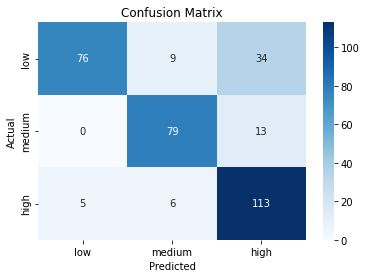

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# Confusion matrix
y_pred = nb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['low', 'medium', 'high'], yticklabels=['low', 'medium', 'high'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [147]:
from sklearn.metrics import classification_report,accuracy_score

# Calculate the accuracy and print the classification report

accuracy = accuracy_score(y_test, y_pred)

# ANSI escape codes for bold and green color in print (optional)
bold = "\033[1m"
green = "\033[32m"
reset = "\033[0m"

print(f"{bold}{green}Accuracy: {accuracy}{reset}")

print(classification_report(y_test, y_pred))


Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.94      0.64      0.76       119
           1       0.84      0.86      0.85        92
           2       0.71      0.91      0.80       124

    accuracy                           0.80       335
   macro avg       0.83      0.80      0.80       335
weighted avg       0.83      0.80      0.80       335



### Build the tree part 3 ---> Visualize the conditional probabilities for each feature given an expense category:




In [174]:
# Get feature names and class names
feature_names = X_train.columns

# retrieves the class names (unique categories of the target variable) from the trained Naïve Bayes model
class_names = nb.classes_

#retrieves the log probabilities of features for each class 
feature_log_prob = nb.feature_log_prob_

feature_prob = np.exp(feature_log_prob)  # Convert log probabilities to actual probabilities


In [175]:
# Create a DataFrame with probabilities
prob_df = pd.DataFrame(feature_prob, columns=feature_names, index=class_names)


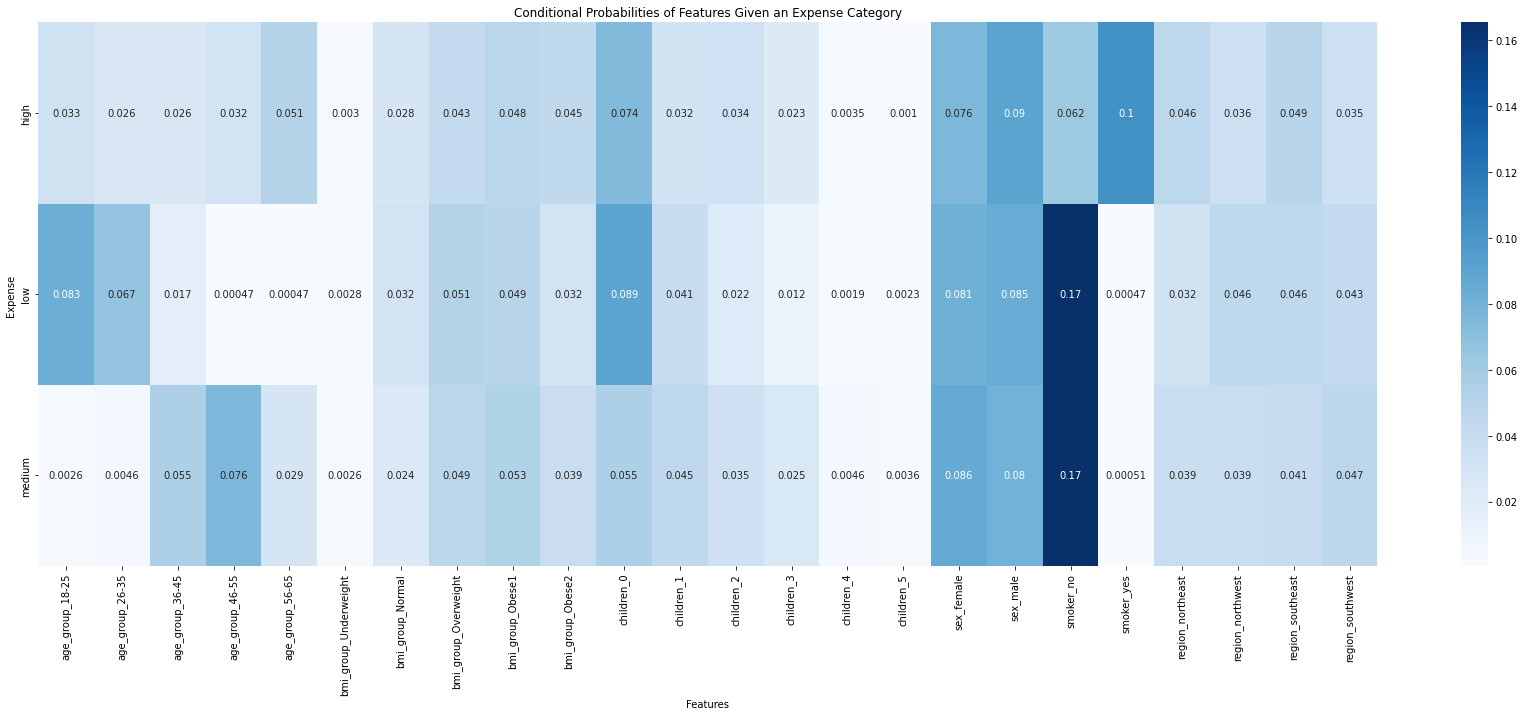

In [176]:
# Define a dictionary that maps numerical values to expense categories
expense_mapping = {1: 'low', 2: 'medium', 0: 'high'}

# Update the index of the prob_df DataFrame
prob_df.index = prob_df.index.map(expense_mapping)

# Plot conditional probabilities
plt.figure(figsize=(30, 10))
sns.heatmap(prob_df, cmap='Blues', annot=True)
plt.title('Conditional Probabilities of Features Given an Expense Category')
plt.xlabel('Features')
plt.ylabel('Expense ')
plt.show()


## Step 5 --> optimizing the tree with pruning method

### optimizing part 1 --> Feature selection: Remove less important or redundant features from the dataset.

In [162]:
from sklearn.feature_selection import SelectKBest, chi2

k = 10  # Number of top features to select
selector = SelectKBest(chi2, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)


### optimizing part 2: Using hyper parameter tuning with cross-validation

**alpha** is a hyperparameter in the Multinomial Naïve Bayes model, which is used for additive (Laplace/Lidstone) smoothing. Smoothing is performed to handle cases when the model encounters feature values that were not present in the training data, which can lead to zero probabilities and impact the classifier's performance.

In [169]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid for the grid search
param_grid = {'alpha': [0.001, 0.01, 0.1, 0.5, 1, 2, 5, 10]}

# Perform grid search
grid_search = GridSearchCV(MultinomialNB(), param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Get the best alpha value
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha: {best_alpha}")


Best alpha: 10


In [170]:
clf_optimized = MultinomialNB(alpha=best_alpha)
clf_optimized.fit(X_train_selected, y_train)


MultinomialNB(alpha=10)

In [171]:
y_pred_optimized = clf_optimized.predict(X_test_selected)
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
print(f"{bold}{green}Optimized Accuracy: {accuracy_optimized}{reset}")



Optimized Accuracy: 0.7970149253731343


**Reuslt:**

*   Even though we done the optimization, it not give any major impact in accuracyfor this dataset

